# Gettings Started

G. Richards
(2016, 2018, 2020)
This notebook contains most everything that we need to get started.  It draws heavily from classes taught by Zeljko Ivezic and Mario Juric, Andy Connolly (http://connolly.github.io/introAstroML/) and Karen Leighly ([seminar.ouml.org](http://seminar.ouml.org)).

## Git and Github

We will use a version control system tool called `git`, and an internet service called [GitHub](http://github.com), that will let you download the notebooks (like this one!) that I will put into the class repository before each class.

If you don't have one already, make an account on [GitHub](https://github.com/), where you can create your own repositories. Let's pause and make sure we all have a github account first!

## Git
To get Git for any platform, see: [https://git-scm.com/download/](https://git-scm.com/download/).

If you're using a Mac, you'll have `git` installed already. Open a terminal window and run

    $ which git

For example:

```
$ which git
/usr/bin/git

$ git --version
git version 2.18.0
```

Let's pause and make sure we all have git installed.

## Downloading the class repository

Once Git is installed, make a place where you are going to put the class repository.  Perhaps in a git subdirectory if you think that you might use more repositories later (we might even for this class!).  
```
$ cd ~
$ mkdir git
$ cd git
$ mkdir PHYS_440_540
$ cd PHYS_440_540
```

Now we need to "clone" the class repository into your account

```
$ git clone https://github.com/gtrichards/PHYS_440_540.git
```    

This will make a subdirectory called `PHYS_440_540` in which you will see a file called `InitialSetup.ipynb` (which is the file that you are reading now!).  See below for how to open this (and other notebooks) using [Jupyter](http://jupyter.org/).

Before each class, you will want to update this repository so that you get any new files that we have put there for you. Do that with

```
$ cd ~/git/PHYS_440_540
$ git pull
```


# Setting Up Your Computer

Everyone will need to have the proper software environment in order to be able to participate in the course.  These instructions have been tested on my Mac laptop, but should work for other platforms as well.

The software requirements (or at least what I am currently running) are as follows:
    Anaconda Python 3.8.X  (but 2.7.X **should** work too if that is what you already have)

In [1]:
from platform import python_version
import numpy
import scipy
import matplotlib
import sklearn

print("python version ",python_version(), " core programming language")
print("numpy version ",numpy.__version__, " efficient array operations")
print("scipy version ",scipy.__version__, " scientific computing tools")
print("matplotlib version ",matplotlib.__version__, " plotting and visualization")
print("sklearn version ",sklearn.__version__, " machine learning")

python version  3.8.3  core programming language
numpy version  1.18.5  efficient array operations
scipy version  1.4.1  scientific computing tools
matplotlib version  3.2.2  plotting and visualization
sklearn version  0.23.1  machine learning


## Anaconda Installation

If you already have Anaconda Python installed on your machine, then please skip to the next section.

If you **don’t** already have Anaconda Python 3.8.X, then go to 
https://www.anaconda.com/download/
and download the installer of your choice (e.g., the graphical OSX installer).  Don't worry--it's free.

Open the install package and follow the instructions, installing **for you only**.

Open a **new** terminal window, and make sure your $PATH variable points to the Anaconda installation. You can do this by typing

    [~]$ which python

The result should show the path to the newly-installed anaconda folder. If not, you must modify your $PATH variable to point to the anaconda directory as follows:

---
### Add Anaconda Python to the path 

How to do this depends on whether you use BASH or TCSH (if you don't know what that means, you are probably using BASH).

I use TCSH, so I added the following line to my .tcshrc file:                                                                                                                                
    set path=(/Users/gtr/opt/anaconda3/bin $path)

If you use BASH instead, you’ll have to add the following line to your .bash_profile
    
    export PATH="$HOME/opt/anaconda3/bin:$PATH"


For good measure (since I have about 12 python installations on my computer), I usually create an alias for Anaconda python in my `.tcshrc` file so that I know that I’m starting that particular python if I’m using the command line.  See also the instruction below for creating different python *environments*.

    alias apython '/Users/gtr/opt/anaconda3/bin/python'
    
The syntax is slightly different for BASH users.  Ask your friends for help.


Now either close that terminal window and open a new one and type

    [~]$ which python

Hopefully all is well now.

---
### Update your Anaconda distribution

    [~]$ conda update conda

Conda is the package management system that comes with anaconda.  **Do this once a week.**


I’m currently running Python 3.8.3 via conda-4.8.3.  You don’t have to be doing *exactly* the same, but if you run into problems that I am not having, that would be a good place to start debugging.

Conda will have installed most of the the other software packages listed above.   The exceptions are noted below.

### Python2 vs. Python3

Things are are bit confusing with Python right now while everyone makes the transition to Python3.  For the most part that already has happened as of the start of 2020.  However, to avoid any related problems as much as possible (e.g., if some legacy code won't run because we are trying to use Python3), it might help to set up some Python *environments*.  To see what current (Anaconda python) environments you have, type:

    [~]$ conda env list
    
If you want to be able to run both Python2 and Python3, then you can make separate environments (in addition to our Python3 "base") with   
    
    [~]$ conda create --name py27 python=2.7
    
    [~]$ conda create --name py38 python=3.8

To activate these environments (which means overriding the default when you start Python), we need to activate them.  

BASH users:

    [~]$ source activate py38
    
    [~]$ source deactivate
    

TCSH (start BASH first)

    [~]$ sh
   
    sh-3.2$ source activate py38
    
    sh-3.2$ source deactivate

If you think that different versions of Python are going to be an issue for you, then please create a new environment to use for class.  If you do that, you'll have to make sure that you are installing software, opening notebooks, etc, from within that environment.  

If you haven't installed Python before or are happy to be forced by this class to use the latest version, then you don't need to worry about environments.  You can just work with the "base" (default).

## Installing astroML

[astroML](http://www.astroml.org/) is the software library that goes together with [the textbook](https://press.princeton.edu/books/hardcover/9780691198309/statistics-data-mining-and-machine-learning-in-astronomy).  Much of it is a series of wrappers to [scikit-learn](http://scikit-learn.org/), where Jake VanderPlas is one of the main contributors to each.  Jake has written an [Intro to AstroML](http://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=6382200) paper that is worth going through to give you an idea of the sorts of things that we'll be doing in the class.

AstroML requires `scikit-learn`. Let's install that first using **conda**:

```bash
$ conda install scikit-learn
```

We'll install the bleeding edge version of `astroML` from github, using **pip** (the python package installer):

```bash
$ pip3 install git+https://github.com/astroML/astroML
```

and same for the add-on packages:

```bash
$ pip3 install git+https://github.com/astroML/astroML_addons
```

## Installing other things

We'll need a few other packages installed as we go along.  Here are the ones that I remembered to write down.  You can either install them now, or you can do it later (when you get an error message!).

    [~]$ conda install -c astropy astroquery
    
    [~]$ pip install corner
    
With all of those things installed, let's check the version of everything again.

In [2]:
from platform import python_version
import numpy
import scipy
import matplotlib
import sklearn
import astroML

print("python version ",python_version(), " core programming language")
print("numpy version ",numpy.__version__, " efficient array operations")
print("scipy version ",scipy.__version__, " scientific computing tools")
print("matplotlib version ",matplotlib.__version__, " plotting and visualization")
print("sklearn version ",sklearn.__version__, " machine learning")
print("astroML version ",astroML.__version__, " astronomical machine learning toolkit")

python version  3.8.3  core programming language
numpy version  1.18.5  efficient array operations
scipy version  1.4.1  scientific computing tools
matplotlib version  3.2.2  plotting and visualization
sklearn version  0.23.1  machine learning
astroML version  1.0  astronomical machine learning toolkit


## Getting Started with Python

The course requirements were set up up to ensure that you have at least *some* (extended) experience with Python.  E.g., you might have taken the 113-114-115 series.  If you don't know *any* Python at all, this class may be pretty tough going.  However, many of you might need a refresher.  A good place to start is **Appendix A** (more specifically A3) in the textbook.  

In this course, we will be taking advantage of the very nice tools developed by the folks at [DataCamp](https://www.datacamp.com/).  You will all be given access to DataCamp by virtue of being enrolled in this course.  As a result you will actually have access to their full library for 6 months.  If you need a Python refresher, I suggest that you work through their [Intro to Python for Data Science](https://www.datacamp.com/courses/intro-to-python-for-data-science) and [Intermediate Python for Data Science](https://www.datacamp.com/courses/intermediate-python-for-data-science).

I would also recommend the [codecademy](https://www.codecademy.com/) course on Python.  It is free and does a good job of walking you through things that you need to learn.

You might also be interested in [A Student’s Guide to Python for Physical Modeling](http://press.princeton.edu/titles/10644.html): Chapters 1-3 provide a good introduction to Python before getting into the "physical modeling" part.  It encourages the use of **spyder**, which is a matlab-like interactive interface for Python (if you'd prefer that sort of interface).

Lastly, from Jake VanderPlas (a contributor to astroML and a co-author of our textbook):

- [A Whirlwind Tour of Python](https://www.oreilly.com/programming/free/files/a-whirlwind-tour-of-python.pdf)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html)

---

## Interfacing with Python

You can interface with Python by 1) starting it on the command line: 

    $ python
    
or 2) using a web-based interactive interface [Jupyter](http://jupyter.org/).

We'll be using the latter.  In fact, each lecture will be in the form of a [jupyter notebook](http://jupyter.org/) that you'll download from the github repository before the start of each class.  

To start the notebook app, run:

    $ jupyter notebook &
    
This will pop up a web page in your default browser and show the Dashboard where you can navigate to a particular notebook or open a new one.  You can also open a notebook directly with 

    $ jupyter notebook InitialSetup.ipynb &
   
If you are creating a new notebook, click on 'new' at the top-right of the page and select 'python'.

For class, I recommend that you first copy each notebook, appending your name to the file.  That way you aren't editing the original and you'll have a version that you can turn in (for the sake of attendance).  For example,

    $cp InitialSetup.ipynb InitialSetup_FirstnameLastname.ipynb
    
And then open that notebook with the command 

    $jupyter notebook InitialSetup_FirstnameLastname.ipynb &


## Working with jupyter notebooks

Notebooks have 2 primary cell types: 'Markdown' and 'Code'.    The Markdown cells are basically just for you to read.  The Code cells are meant to be executed (perhaps after you have filled in some blanks).  

To execute a cell in the notebook, type '**shift-return**'. If you see a * in the bracket left of the cell or a 'Busy' in the tab title, it means the command is in the process of running, and you need to wait for it to finish.

The notebook is autosaved, so that when you return to a notebook, everything is the same as you left it. If you want to reset it, you can do “revert to checkpoint”.  If you save it yourself, you will create a checkpoint, and the original version will be unavailable.



Here are some useful commands to get you started (# followed by text indicates a comment and not what you type)!

    In [ ]: ?          # basic help function.  Pops open a sub-frame at the bottom of page.  
                         Close with "x".
    
    In [ ]: %quickref  # Pops open a quick reference card
    
    In [ ]: ! 	       # spawning out to the operating system; 
                         e.g files=!ls will fill the variable files 
                         with a list of files in your directory.


Jupyter also contains a number of [“magic” commands](https://ipython.org/ipython-doc/dev/interactive/magics.html).
Two examples are

    In [ ]: %matplotlib inline  # makes plots within the web browser instead of popping up a new window
    
    In [ ]: %whos               # lists the vectors, etc. that you have defined.

Jupyter also has lots of [keyboard shortcuts](https://ipython.org/ipython-doc/1/interactive/notebook.html#keyboard-shortcuts) – the main one is shift-enter to run a cell.

## (Brief) Review of Python Basics

To start with Python uses the following [numerical data types and operations](https://docs.python.org/2/library/stdtypes.html#boolean-operations-and-or-not)

We will encounter three main types of collections of data:

    Lists: a mutable array of data
    Tuples: ordered, immutable list
    Dictionaries: keyword/value lookup

It is worth noting that python begins indexing at 0 and uses [row-major order](https://en.wikipedia.org/wiki/Row-major_order), which means that pairs of values are written as (y,x) instead of (x,y).  This actually makes sense when one is dealing with tables of data.


Tuple

    its most notable property is that it is immutable – after being defined, it cannot be changed
    denoted by parentheses, e.g., x=(5.0,7.0,9.0,11.0)
    to index, use square brackets, e.g., print(x[0])
    can get part of one using :, e.g., try print(x[2:]) etc.

List

    in contrast to a tuple, it can be reassigned
    denoted with brackets, e.g,. y=[5.0,7.0,9.0,11.0]
    to index, also use square brackets, e.g., print(x[0])
    can get part of one using :, e.g., try print(y[2:]) etc.

Dictionary

    assigns a value to a key, for example z={'a':2,'b':4,'c':6}, where a,b,c are the keywords.
    the dictionary is indexed by the keyword, e.g., print(z['a'])
    they can be quite complicated.
    
Here is a lot more on data structures: [https://docs.python.org/2/tutorial/datastructures.html](https://docs.python.org/2/tutorial/datastructures.html).

---
### Methods and Attributes

Each type of data structure has associated “methods”. A method is like a little built-in function that can be run on a data structure.

For example, open a new cell (or in a python terminal window) and do the following:

```python
v=[27.0,35.0,101.0,57.0]
print(v)
v.sort()
print(v)
```

So v has now been replaced with the sorted v.

The parentheses indicate that this is a "method", which is something that can (but doesn't have to) take *arguments*.  An "attribute" on the other hand is just a property.  E.g., if you have an object called `shape` and shape contains information like `area`, `length`, `width`, etc., then you access those values as

```python
print(shape.area)
```

Basic mathematical operations that can be applied to your data are found here: [https://docs.python.org/2/library/math.html](https://docs.python.org/2/library/math.html).

OK, hopefully that is a refresher for everyone, so let's get going with more complicated stuff.
If you need more of a refresher than that, see the links above.

## NumPy

NumPy is short for Numerical Python. It is the foundational package for scientific computing in Python. It is a library which will allow us to work with data structures called **arrays** that are more efficient for storing amd manipulating data than other Python data structures (or C++ for that matter). 

For example, cut and paste this into a new cell, then type shift-enter to run it:

```python
import numpy as np
xlist = [1,2,3]
xarray = np.array(xlist)
twice_xarray = 2*xarray
print(twice_xarray)
```

This is far better than creating a for loop over the entries in `xlist` or even something fancier like a "list comprehension"
```python
   twice_xlist = [2*x for x in xlist]
   print(twice_xlist)
```
Note the lack of commas in the array as compared to the list.

To load the Numpy library type:  

    In [ ]: import numpy as np
    
In fact, just plan on starting **every** notebook with this!    

The basic unit for numpy is an [ndarray](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html).  See the link for examples of how to define, index, slice, etc. the array.

There are quite a few **methods** associated with numpy arrays.  Some useful ones include:

|Method |	Property|
|-------|-----------|
|np.zeros(5,float) |	yields a 5-element array of zeros of type float |
|a=np.empty(4) |	yields a 4-element empty array |
|a.fill(5.5) |	fills that array with 5.5 for all elements |
|np.arange(5) |	yields an integer array of length 5 with increasing values | 
|b=np.random.normal(10,3,5) |	yields a 5 element array of normally distributed numbers with mean 10 and variance 3 |
|mask=b > 9 |	creates a boolean array determing which numbers are greater than 9 |
|print(b[mask]) |	prints the ones with values > 9 |
|b[mask]=0 | sets the ones > 9 to zero |

Arrays can be multidimensional, e.g., ```c=np.random.normal(10,3,(2,4))```, creates a 2 x 4 array with normally distributed numbers with mean 10 and variance 3.

More methods for multidimensional arrays:

|Method |	Property|
|-------|-----------|
|d=c[0,:] |	grabs the first (0th) row of c. |
|d=c[1,:] |	grabs the second (1st) row of c. |
|d=c[:,0] |	grabs the first column of c. |
|c.dtype |	data type |
|c.size |	total number of elements |
|c.ndim |	number of dimensions |
|c.shape |	shape or dimensionality |
|c.nbytes |	memory used (bytes) |
|c.min() |	gives the minimum of c |
|c.max() |	gives the maximum of c |
|c.sum() |	sum of all elements |
|c.mean() |	mean of all elements |
|c.std() |	standard deviation of all elements |
|c.sum(axis=0) | will present sum along the 0th axis (column direction). The result will have reduced dimensionality |

You can also operate with arrays, for example, adding them together, multiplying them, multiplying or adding a constant. There are, however, "broadcasting" rules so that you need to make sure you know what you are doing when dealing with arrays of different sizes.

## SciPy


[SciPy](http://docs.scipy.org/doc/scipy/reference/) is an "open-source software for mathematics, science, and engineering".  We 'import' it the same way that we import numpy:


    In [ ]: import scipy as sp


SciPy is a suite of tools for data analysis including integration, statistical functions, interpolation.  It is built on top of Numpy. Where Numpy is intended for array *manipulation*, Scipy is intended for *analysis*. This is where the useful tools that are built into IDL (such as tsum, interpol, etc) will be.  It may be worth looking at the users guide to get an idea of the kinds of functions are available.   N.B.  For some packages you need to import more than just the main scipy package.  So, for example to see what is available in the scipy.integrate package, do the following:

```
import scipy.integrate
scipy.integrate?
```



## Pandas

[Pandas](https://pandas.pydata.org/) is an "is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.". 

We 'import' it the same way that we import numpy:


    In [ ]: import pandas as pd

Pandas is a library designed with manipulating numerical tables and time series in mind and is a very useful tool for data science.   We will be making use of Pandas [DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) in the course of this class. You can get some experience using Pandas either with [DataCamp](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python) or with [Chapter 3 of the Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html).

```
import pandas as pd
pd?
```

## Scikit-learn

The [Scikit-learn library](http://scikit-learn.org/) forms the core of computing tools that we will use for this class.  It probably needs its own introductory tutorial as both the input and output may not be quite what you would have expected.    You might want to spend some time going through their quick start guide, user's guide and tutorials here: [http://scikit-learn.org/stable/documentation.html](http://scikit-learn.org/stable/documentation.html).


## Intro to Everything

Lastly, here is a tutorial on the whole scientific Python "ecosystem": [www.scipy-lectures.org](http://www.scipy-lectures.org/)

## Testing, Testing, 1, 2, 3

OK, let's make sure that your software is all installed and that we can use `git`.

## Matplotlib Example

It is generally useful to be able to visualize your data.  We will do that using the 
[matplotlib](http://matplotlib.org/) library.   Most of you should be familiar with it already, but we will likely be making some plots that are more complex than you are used to.  One nice resource is this [thumbnail gallery](http://matplotlib.org/gallery.html) which you can use to figure out how to make a new plot.

Let's make sure that everything is working by making a simple plot


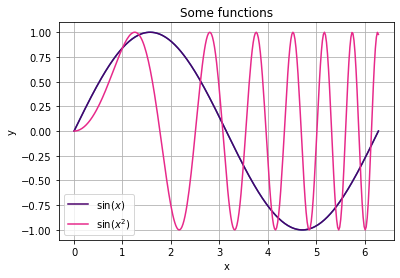

In [7]:
# magic command to make the figure pop up below instead of in a new window
%matplotlib inline 

# invoke pyplot in matplotlib, give it an alias
import matplotlib.pyplot as plt  
import numpy as np

x = np.linspace(0, 2*np.pi, 300)
y = np.sin(x)
plt.plot(x, y)
y2 = np.sin(x**2)
plt.plot(x, y, label=r'$\sin(x)$', color='#49006a')
plt.plot(x, y2, label=r'$\sin(x^2)$', color='#e7298a')
plt.title('Some functions')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

You can change both the [marker/line styles](http://matplotlib.org/examples/lines_bars_and_markers/) and [colors](http://matplotlib.org/api/colors_api.html), but I highly recommend the use of the colors in the [palettable library](https://jiffyclub.github.io/palettable/), where you can see the colors at [http://colorbrewer2.org/](http://colorbrewer2.org/).

Try making some changes to the code above and see what happens.

## AstroML Example

Now let's download and run one of the astroML examples inside the Jupyter notebook.

In [2]:
! curl -O https://raw.githubusercontent.com/astroML/astroML/master/examples/datasets/plot_SDSS_SSPP.py

/Users/keriheuer/anaconda3/lib/python3.7/site-packages/astroML/stats/_binned_statistic.py:323: RuntimeWarning: invalid value encountered in true_divide
  result[a] /= flatcount
/Users/keriheuer/GitHub/PHYS_440_540/notebooks/plot_SDSS_SSPP.py:53: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(N.T), origin='lower',
/Users/keriheuer/GitHub/PHYS_440_540/notebooks/plot_SDSS_SSPP.py:84: RuntimeWarning: divide by zero encountered in log10
  plt.contour(np.log10(N.T), levels, colors='k', linewidths=1,


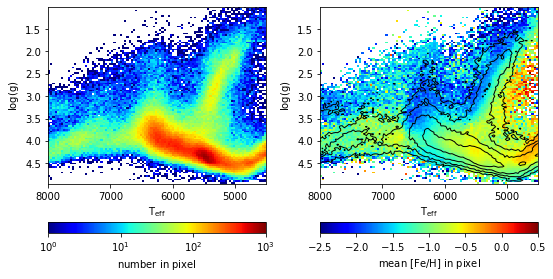

In [3]:
#This will run the downloaded file
%matplotlib inline
%run ./plot_SDSS_SSPP.py

## Git Example

Lastly, let's practice some git!

1. create a new repository on github, with a README file. Name it `PHYS_440_540_test`.

2. clone it using:
```bash
cd ~/git
git clone https://github.com/YOURUSERNAME/PHYS_440_540_test
```
3. start Jupyter in the cloned directory
```
cd PHYS_440_540_test
jupyter notebook &
```
4. create a new notebook. Name it `hello.ipynb` (with File:Rename), and add a cell with the following piece of code:
```python
print "Hello World!"
```
5. add the notebook to your git repository and commit by running (in the terminal window) the following:
```bash
git add hello.ipynb
git commit -m "Added hello.ipynb to repository."
```
6. see what happened:
```bash
git log
```
7. make another change in the Jupyter notebook. For example, add another cell ("+" icon on the toolbar) with the following:
```python
x = 2+2
print(x)
```
8. see what happened
```bash
git status
```
9. commit changed files
```
git commit -am "Updated hello.ipynb with complex mathematics."
```
10. "push" the changes to github
```
git push
```
11. go browse the result on github

## Summary

At this point, all of you should have:
* A `GitHub` account and a basic understanding of `git`
* Installed the Anaconda Python Distribution with Python 3
* Installed AstroML
* The ability to create and run Jupyter notebooks

Now we're ready to do some astro-statistics!